In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The Data contained has the following information:
Country- this is the country for which the vaccination information is provided;
Country ISO Code - ISO code for the country;
Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
Total number of vaccinations - this is the absolute number of total immunizations in the country
Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more, mostly 2 vaccines; at a certain moment, the number of vaccination might be larger than the number of people
Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
Number of vaccinations per day - number of daily vaccination for that day and country;
Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
Vaccines used in the country - total number of vaccines used in the country (up to date);
Source name - source of the information (national authority, international organization, local organization etc.);
Source website - website of the source of information

In [3]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,1/10/21,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,1/11/21,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,1/12/21,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,1/13/21,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,1/14/21,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 15 columns):
country                                4043 non-null object
iso_code                               3755 non-null object
date                                   4043 non-null object
total_vaccinations                     2647 non-null float64
people_vaccinated                      2237 non-null float64
people_fully_vaccinated                1481 non-null float64
daily_vaccinations_raw                 2237 non-null float64
daily_vaccinations                     3896 non-null float64
total_vaccinations_per_hundred         2647 non-null float64
people_vaccinated_per_hundred          2237 non-null float64
people_fully_vaccinated_per_hundred    1481 non-null float64
daily_vaccinations_per_million         3896 non-null float64
vaccines                               4043 non-null object
source_name                            4043 non-null object
source_website                         4043 

In [5]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [82]:
##replacing NaN values with zero
df.fillna(0)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,1/10/21,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,1/11/21,0.0,0.0,0.0,0.0,64.0,0.00,0.00,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,1/12/21,128.0,128.0,0.0,0.0,64.0,0.00,0.00,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,1/13/21,188.0,188.0,0.0,60.0,63.0,0.01,0.01,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,1/14/21,266.0,266.0,0.0,78.0,66.0,0.01,0.01,0.00,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,1/15/21,308.0,308.0,0.0,42.0,62.0,0.01,0.01,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,1/16/21,369.0,369.0,0.0,61.0,62.0,0.01,0.01,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,1/17/21,405.0,405.0,0.0,36.0,58.0,0.01,0.01,0.00,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,1/18/21,447.0,447.0,0.0,42.0,55.0,0.02,0.02,0.00,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,1/19/21,483.0,483.0,0.0,36.0,51.0,0.02,0.02,0.00,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [84]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.647000e+03,2.237000e+03,1.481000e+03,2.237000e+03,3.896000e+03,2647.000000,2237.000000,1481.000000,3896.000000
mean,1.583567e+06,1.384480e+06,4.308568e+05,7.215689e+04,5.552814e+04,6.563744,5.447591,2.044227,2374.866273
std,5.322104e+06,4.350214e+06,1.649615e+06,2.028147e+05,1.746934e+05,12.321515,9.003553,5.110196,4434.084388
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.060900e+04,2.846600e+04,9.844000e+03,2.048000e+03,1.129000e+03,0.590000,0.590000,0.170000,326.000000
50%,1.917900e+05,1.769260e+05,4.402100e+04,1.110500e+04,5.841500e+03,2.510000,2.400000,0.770000,1038.000000
75%,7.784380e+05,6.761860e+05,2.236090e+05,5.130500e+04,2.631950e+04,5.935000,4.700000,1.700000,2012.250000
max,6.503208e+07,4.454497e+07,1.988254e+07,2.242472e+06,1.916190e+06,93.890000,56.100000,37.780000,54264.000000


In [8]:
df.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.991914,0.922624,0.881834,0.950441,0.191343,0.194428,0.084026,0.119599
people_vaccinated,0.991914,1.000000,0.866953,0.894527,0.961280,0.174999,0.201766,0.053144,0.112262
people_fully_vaccinated,0.922624,0.866953,1.000000,0.779854,0.841113,0.161936,0.141516,0.175751,0.107618
daily_vaccinations_raw,0.881834,0.894527,0.779854,1.000000,0.945779,0.107990,0.115397,0.024102,0.103499
daily_vaccinations,0.950441,0.961280,0.841113,0.945779,1.000000,0.117273,0.130904,0.030605,0.063438
total_vaccinations_per_hundred,0.191343,0.174999,0.161936,0.107990,0.117273,1.000000,0.973118,0.902924,0.827431
people_vaccinated_per_hundred,0.194428,0.201766,0.141516,0.115397,0.130904,0.973118,1.000000,0.785224,0.862092
people_fully_vaccinated_per_hundred,0.084026,0.053144,0.175751,0.024102,0.030605,0.902924,0.785224,1.000000,0.741915
daily_vaccinations_per_million,0.119599,0.112262,0.107618,0.103499,0.063438,0.827431,0.862092,0.741915,1.000000


In [21]:
byCountry = df.groupby('country').count()
byCountry

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Albania,41,41,16,15,4,11,34,16,15,4,34,41,41,41
Algeria,22,22,3,0,0,1,21,3,0,0,21,22,22,22
Andorra,26,26,5,5,0,0,25,5,5,0,25,26,26,26
Anguilla,11,11,3,3,0,1,10,3,3,0,10,11,11,11
Argentina,57,57,38,32,32,28,56,38,32,32,56,57,57,57
Australia,9,9,9,9,0,8,2,9,9,0,2,9,9,9
Austria,45,45,41,45,37,40,41,41,45,37,41,45,45,45
Azerbaijan,21,21,2,2,0,0,20,2,2,0,20,21,21,21
Bahrain,63,63,58,58,0,56,62,58,58,0,62,63,63,63


In [39]:
byCountry['total_vaccinations'].max()

67

In [50]:
byCountry[byCountry['total_vaccinations']==67]

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Israel,67,67,67,67,51,66,66,67,67,51,66,67,67,67


In [51]:
byCountry['total_vaccinations'].min()

1

In [52]:
byCountry[byCountry['total_vaccinations']==1]

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Greenland,1,1,1,1,0,0,0,1,1,0,0,1,1,1
Saint Helena,1,1,1,0,0,0,0,1,0,0,0,1,1,1


/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


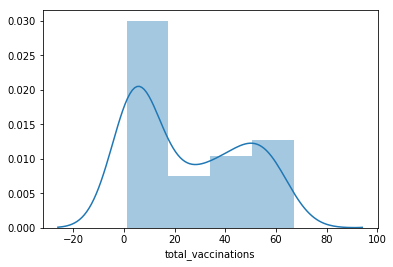

In [75]:
sns.distplot(byCountry['total_vaccinations'])

In [88]:
## commonly used vaccines

In [94]:
df['vaccines'].value_counts().head()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech    1110
Pfizer/BioNTech                                  850
Oxford/AstraZeneca, Pfizer/BioNTech              653
Moderna, Pfizer/BioNTech                         345
Sputnik V                                        215
Name: vaccines, dtype: int64

In [95]:
## the combination of Moderna, Oxford/AstraZeneca, Pfizer/BioNTech is frequently administered

In [113]:
## Analyzing the common combination of vaccines in countries

In [114]:
df[df['vaccines']=='Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'].sort_values(by='people_vaccinated', ascending=False)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1496,Germany,DEU,2/23/21,5373222.0,3518294.0,1854928.0,143137.0,131705.0,6.41,4.20,2.21,1572.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1495,Germany,DEU,2/22/21,5230085.0,3419360.0,1810725.0,143101.0,130657.0,6.24,4.08,2.16,1559.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1494,Germany,DEU,2/21/21,5086984.0,3322675.0,1764309.0,85449.0,128260.0,6.07,3.97,2.11,1531.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1493,Germany,DEU,2/20/21,5001535.0,3266197.0,1735338.0,111478.0,125523.0,5.97,3.90,2.07,1498.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1492,Germany,DEU,2/19/21,4890057.0,3191959.0,1698098.0,147674.0,125233.0,5.84,3.81,2.03,1495.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1491,Germany,DEU,2/18/21,4742383.0,3097333.0,1645050.0,143227.0,126597.0,5.66,3.70,1.96,1511.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1490,Germany,DEU,2/17/21,4599156.0,3005972.0,1593184.0,147869.0,126593.0,5.49,3.59,1.90,1511.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1489,Germany,DEU,2/16/21,4451287.0,2912468.0,1538819.0,135798.0,126572.0,5.31,3.48,1.84,1511.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1488,Germany,DEU,2/15/21,4315489.0,2831275.0,1484214.0,126322.0,124903.0,5.15,3.38,1.77,1491.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/
1487,Germany,DEU,2/14/21,4189167.0,2760704.0,1428463.0,66293.0,122176.0,5.00,3.30,1.70,1458.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Robert Koch Institut,https://impfdashboard.de/


In [112]:
df[df['vaccines']=='Pfizer/BioNTech'].sort_values(by='people_vaccinated', ascending=False)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3465,Slovakia,SVK,2/23/21,394790.0,286408.0,108382.0,11652.0,10240.0,7.23,5.25,1.99,1876.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3464,Slovakia,SVK,2/22/21,383138.0,280739.0,102399.0,12320.0,10149.0,7.02,5.14,1.88,1859.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3463,Slovakia,SVK,2/21/21,370818.0,275309.0,95509.0,6074.0,10255.0,6.79,5.04,1.75,1878.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3462,Slovakia,SVK,2/20/21,364744.0,269235.0,95509.0,6676.0,10931.0,6.68,4.93,1.75,2002.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3461,Slovakia,SVK,2/19/21,358068.0,262842.0,95226.0,12863.0,10613.0,6.56,4.81,1.74,1944.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3460,Slovakia,SVK,2/18/21,345205.0,256708.0,88497.0,10792.0,10781.0,6.32,4.70,1.62,1975.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3459,Slovakia,SVK,2/17/21,334413.0,252513.0,81900.0,11306.0,11184.0,6.13,4.63,1.50,2048.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
3414,Singapore,SGP,2/18/21,360000.0,250000.0,110000.0,NaN,13000.0,6.15,4.27,1.88,2222.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3406,Singapore,SGP,2/10/21,256000.0,250000.0,6000.0,NaN,9375.0,4.38,4.27,0.10,1602.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3458,Slovakia,SVK,2/16/21,323107.0,247265.0,75842.0,11013.0,11427.0,5.92,4.53,1.39,2093.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...


In [115]:
df[df['vaccines']=='Oxford/AstraZeneca, Pfizer/BioNTech'].sort_values(by='people_vaccinated', ascending=False)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3898,United Kingdom,GBR,2/22/21,18558969.0,17916181.0,642788.0,210804.0,348100.0,27.34,26.39,0.95,5128.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3897,United Kingdom,GBR,2/21/21,18348165.0,17723840.0,624325.0,150896.0,358341.0,27.03,26.11,0.92,5279.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3896,United Kingdom,GBR,2/20/21,18197269.0,17582121.0,615148.0,344942.0,371052.0,26.81,25.90,0.91,5466.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3895,United Kingdom,GBR,2/19/21,17852327.0,17247442.0,604885.0,387200.0,394376.0,26.30,25.41,0.89,5809.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3894,United Kingdom,GBR,2/18/21,17465127.0,16875536.0,589591.0,468321.0,417544.0,25.73,24.86,0.87,6151.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3893,United Kingdom,GBR,2/17/21,16996806.0,16423082.0,573724.0,497257.0,423322.0,25.04,24.19,0.85,6236.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3892,United Kingdom,GBR,2/16/21,16499549.0,15940972.0,558577.0,377277.0,417385.0,24.30,23.48,0.82,6148.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3891,United Kingdom,GBR,2/15/21,16122272.0,15576107.0,546165.0,282491.0,422771.0,23.75,22.94,0.80,6228.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3890,United Kingdom,GBR,2/14/21,15839781.0,15300151.0,539630.0,239877.0,433313.0,23.33,22.54,0.79,6383.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1233,England,NaN,2/22/21,15631937.0,15113158.0,518779.0,160428.0,293813.0,27.77,26.85,0.92,5220.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [117]:
df[df['vaccines']=='Moderna, Pfizer/BioNTech'].sort_values(by='people_vaccinated', ascending=False)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3964,United States,USA,2/23/21,65032083.0,44544969.0,19882544.0,854609.0,1401674.0,19.44,13.32,5.94,4191.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3963,United States,USA,2/22/21,64177474.0,44138118.0,19438495.0,1086840.0,1446445.0,19.19,13.20,5.81,4325.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3962,United States,USA,2/21/21,63090634.0,43628092.0,18865319.0,1801134.0,1458040.0,18.86,13.05,5.64,4360.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3961,United States,USA,2/20/21,61289500.0,42809595.0,17895667.0,1704457.0,1521088.0,18.33,12.80,5.35,4548.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3960,United States,USA,2/19/21,59585043.0,41977401.0,17039118.0,1847276.0,1596355.0,17.82,12.55,5.09,4773.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3959,United States,USA,2/18/21,57737767.0,41021049.0,16162358.0,1455940.0,1621071.0,17.26,12.27,4.83,4847.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3958,United States,USA,2/17/21,56281827.0,40268009.0,15471536.0,1061463.0,1644551.0,16.83,12.04,4.63,4917.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3957,United States,USA,2/16/21,55220364.0,39670551.0,15015434.0,NaN,1716311.0,16.51,11.86,4.49,5132.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3955,United States,USA,2/14/21,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3954,United States,USA,2/13/21,50641884.0,37056122.0,13082172.0,2231326.0,1657703.0,15.14,11.08,3.91,4957.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [118]:
df[df['vaccines']=='Sputnik V'].sort_values(by='people_vaccinated', ascending=False).

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3175,Russia,RUS,2/10/21,3900000.0,2200000.0,1700000.0,NaN,103571.0,2.67,1.51,1.16,710.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
3147,Russia,RUS,1/13/21,1000000.0,1000000.0,NaN,NaN,18182.0,0.69,0.69,NaN,125.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
3136,Russia,RUS,1/2/21,800000.0,800000.0,NaN,NaN,68000.0,0.55,0.55,NaN,466.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
156,Argentina,ARG,2/23/21,746615.0,481689.0,264926.0,24381.0,19349.0,1.65,1.07,0.59,428.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
155,Argentina,ARG,2/22/21,722234.0,458822.0,263412.0,1967.0,16063.0,1.60,1.02,0.58,355.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
154,Argentina,ARG,2/21/21,720267.0,456929.0,263338.0,13119.0,15809.0,1.59,1.01,0.58,350.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
153,Argentina,ARG,2/20/21,707148.0,445614.0,261534.0,38494.0,14415.0,1.56,0.99,0.58,319.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
152,Argentina,ARG,2/19/21,668654.0,414958.0,253696.0,33071.0,11003.0,1.48,0.92,0.56,243.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
151,Argentina,ARG,2/18/21,635583.0,392399.0,243184.0,23261.0,8951.0,1.41,0.87,0.54,198.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
150,Argentina,ARG,2/17/21,612322.0,374002.0,238320.0,1153.0,11003.0,1.35,0.83,0.53,243.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [119]:
## From the analysis above, it is safe to conclude that different vaccines are common with one or more countries than the other

In [120]:
## Moderna and Pfizer are popular in the United States of America
## Moderna, Oxford/AstraZeneca, Pfizer/BioNTech are commonly used in Germany
## Pfizer/BioNTech is common is slovakia
## Oxford/AstraZeneca, Pfizer/BioNTech are used frequently used in United Kingdom
## Sputnik V is used in Argentina and Russia

/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


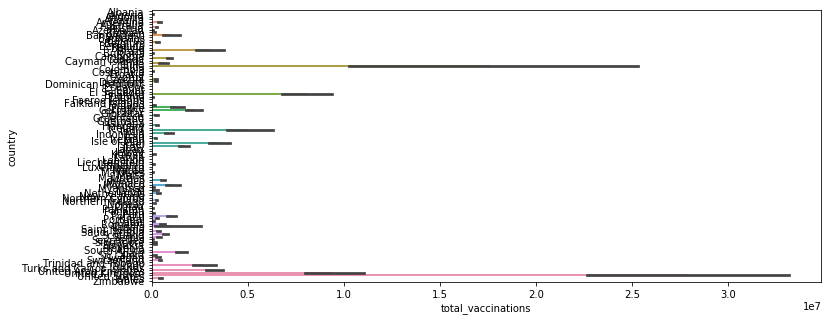

In [123]:
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(x='total_vaccinations',y='country', data=df)


In [144]:
total_vacc = df.sort_values(by='total_vaccinations',ascending=False)[0:5000]
total_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3964,United States,USA,2/23/21,65032083.0,44544969.0,19882544.0,854609.0,1401674.0,19.44,13.32,5.94,4191.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3963,United States,USA,2/22/21,64177474.0,44138118.0,19438495.0,1086840.0,1446445.0,19.19,13.20,5.81,4325.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3962,United States,USA,2/21/21,63090634.0,43628092.0,18865319.0,1801134.0,1458040.0,18.86,13.05,5.64,4360.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3961,United States,USA,2/20/21,61289500.0,42809595.0,17895667.0,1704457.0,1521088.0,18.33,12.80,5.35,4548.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3960,United States,USA,2/19/21,59585043.0,41977401.0,17039118.0,1847276.0,1596355.0,17.82,12.55,5.09,4773.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3959,United States,USA,2/18/21,57737767.0,41021049.0,16162358.0,1455940.0,1621071.0,17.26,12.27,4.83,4847.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3958,United States,USA,2/17/21,56281827.0,40268009.0,15471536.0,1061463.0,1644551.0,16.83,12.04,4.63,4917.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3957,United States,USA,2/16/21,55220364.0,39670551.0,15015434.0,NaN,1716311.0,16.51,11.86,4.49,5132.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3955,United States,USA,2/14/21,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3954,United States,USA,2/13/21,50641884.0,37056122.0,13082172.0,2231326.0,1657703.0,15.14,11.08,3.91,4957.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [145]:
x=total_vacc['total_vaccinations']
y=total_vacc['country']

/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'country')

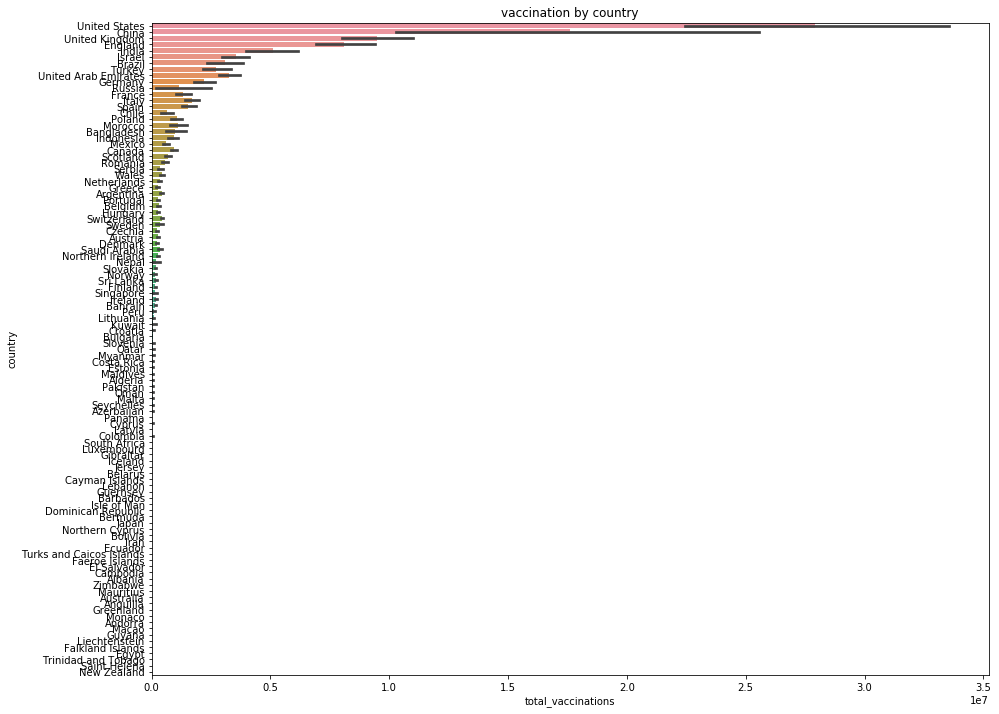

In [150]:
fig,ax = plt.subplots(figsize=(15,12))
sns.barplot(x=total_vacc['total_vaccinations'],y=total_vacc['country'], data=df)
ax.set_title('vaccination by country')
ax.set_xlabel('total_vaccinations')
ax.set_ylabel('country')